In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn import preprocessing
from sklearn import metrics
from sklearn import svm

from sklearn.model_selection import GridSearchCV

In [2]:
vehicle_df = pd.read_csv('vehicle.csv')

In [3]:
vehicle_df.shape

(846, 19)

In [4]:
vehicle_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [5]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [6]:
vehicle_df.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

### The following attributes have missing values;
    
'circularity', 'distance_circularity', 'radius_ratio',   'pr.axis_aspect_ratio', 'scatter_ratio','elongatedness', 'pr.axis_rectangularity','scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration','scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1','skewness_about.2'

In [7]:
#Checking the number of null values in each column

vehicle_df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [8]:
# Splitting the vehicle_df data 

ind_var = vehicle_df[vehicle_df.columns[:-1]]
dep_var = vehicle_df["class"]

In [9]:
# Treating the missing values

ind_var = ind_var.apply(lambda a: a.fillna(a.median()),axis=0)

In [10]:
ind_var.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
dtype: int64

In [11]:
vehicle_df_complete = ind_var.join(dep_var)

In [12]:
vehicle_df_complete.shape

(846, 19)

In [13]:
vehicle_df_complete.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

# Univariate

In [108]:
vehicle_df_complete.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

count    846.000000
mean      93.678487
std        8.234474
min       73.000000
25%       87.000000
50%       93.000000
75%      100.000000
max      119.000000
Name: compactness, dtype: float64


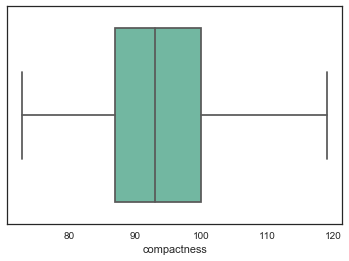

In [132]:
sns.set_style("white")
sns.boxplot(vehicle_df_complete['compactness'], palette= "BuGn_r")
print(vehicle_df_complete['compactness'].describe())

count    846.000000
mean      44.823877
std        6.134272
min       33.000000
25%       40.000000
50%       44.000000
75%       49.000000
max       59.000000
Name: circularity, dtype: float64


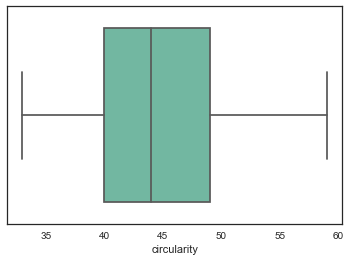

In [133]:
sns.set_style("white")
sns.boxplot(vehicle_df_complete['circularity'], palette= "BuGn_r")
print(vehicle_df_complete['circularity'].describe())

count    846.000000
mean      82.100473
std       15.741569
min       40.000000
25%       70.000000
50%       80.000000
75%       98.000000
max      112.000000
Name: distance_circularity, dtype: float64


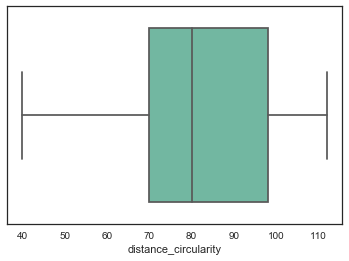

In [134]:
sns.set_style("white")
sns.boxplot(vehicle_df_complete['distance_circularity'], palette= "BuGn_r")
print(vehicle_df_complete['distance_circularity'].describe())

count    846.000000
mean     168.874704
std       33.401356
min      104.000000
25%      141.000000
50%      167.000000
75%      195.000000
max      333.000000
Name: radius_ratio, dtype: float64


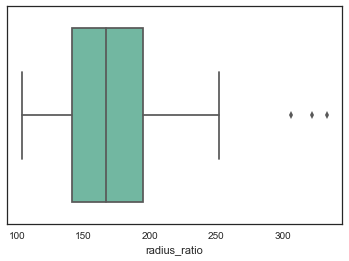

In [135]:
sns.set_style("white")
sns.boxplot(vehicle_df_complete['radius_ratio'], palette= "BuGn_r")
print(vehicle_df_complete['radius_ratio'].describe())

count    846.000000
mean      61.677305
std        7.882188
min       47.000000
25%       57.000000
50%       61.000000
75%       65.000000
max      138.000000
Name: pr.axis_aspect_ratio, dtype: float64


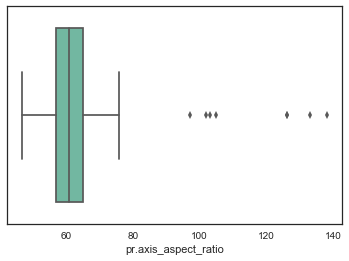

In [136]:
sns.set_style("white")
sns.boxplot(vehicle_df_complete['pr.axis_aspect_ratio'], palette= "BuGn_r")
print(vehicle_df_complete['pr.axis_aspect_ratio'].describe())

count    846.000000
mean       8.567376
std        4.601217
min        2.000000
25%        7.000000
50%        8.000000
75%       10.000000
max       55.000000
Name: max.length_aspect_ratio, dtype: float64


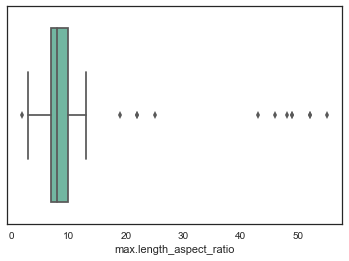

In [137]:
sns.set_style("white")
sns.boxplot(vehicle_df_complete['max.length_aspect_ratio'], palette= "BuGn_r")
print(vehicle_df_complete['max.length_aspect_ratio'].describe())

count    846.000000
mean     168.887707
std       33.197710
min      112.000000
25%      147.000000
50%      157.000000
75%      198.000000
max      265.000000
Name: scatter_ratio, dtype: float64


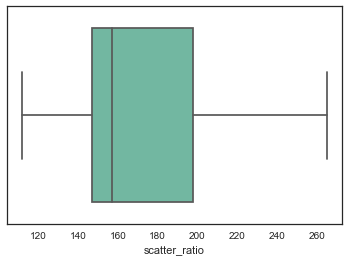

In [138]:
sns.set_style("white")
sns.boxplot(vehicle_df_complete['scatter_ratio'], palette= "BuGn_r")
print(vehicle_df_complete['scatter_ratio'].describe())

count    846.000000
mean      40.936170
std        7.811882
min       26.000000
25%       33.000000
50%       43.000000
75%       46.000000
max       61.000000
Name: elongatedness, dtype: float64


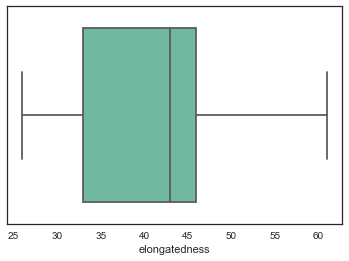

In [139]:
sns.set_style("white")
sns.boxplot(vehicle_df_complete['elongatedness'], palette= "BuGn_r")
print(vehicle_df_complete['elongatedness'].describe())

count    846.000000
mean      20.580378
std        2.588558
min       17.000000
25%       19.000000
50%       20.000000
75%       23.000000
max       29.000000
Name: pr.axis_rectangularity, dtype: float64


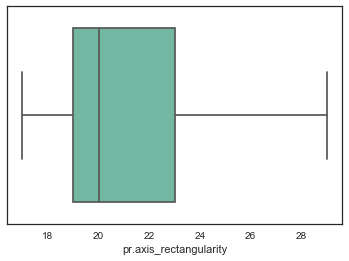

In [140]:
sns.set_style("white")
sns.boxplot(vehicle_df_complete['pr.axis_rectangularity'], palette= "BuGn_r")
print(vehicle_df_complete['pr.axis_rectangularity'].describe())

count    846.000000
mean     147.998818
std       14.515652
min      118.000000
25%      137.000000
50%      146.000000
75%      159.000000
max      188.000000
Name: max.length_rectangularity, dtype: float64


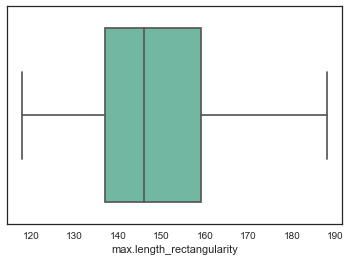

In [141]:
sns.set_style("white")
sns.boxplot(vehicle_df_complete['max.length_rectangularity'], palette= "BuGn_r")
print(vehicle_df_complete['max.length_rectangularity'].describe())

count    846.000000
mean     188.596927
std       31.360427
min      130.000000
25%      167.000000
50%      179.000000
75%      217.000000
max      320.000000
Name: scaled_variance, dtype: float64


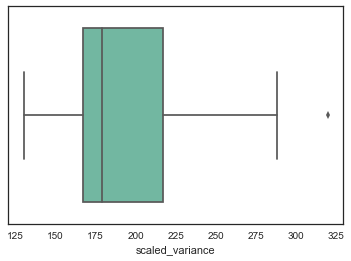

In [142]:
sns.set_style("white")
sns.boxplot(vehicle_df_complete['scaled_variance'], palette= "BuGn_r")
print(vehicle_df_complete['scaled_variance'].describe())

count     846.000000
mean      439.314421
std       176.496341
min       184.000000
25%       318.250000
50%       363.500000
75%       586.750000
max      1018.000000
Name: scaled_variance.1, dtype: float64


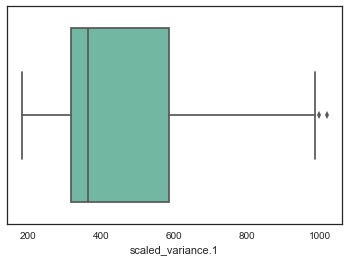

In [143]:
sns.set_style("white")
sns.boxplot(vehicle_df_complete['scaled_variance.1'], palette= "BuGn_r")
print(vehicle_df_complete['scaled_variance.1'].describe())

count    846.000000
mean     174.706856
std       32.546277
min      109.000000
25%      149.000000
50%      173.500000
75%      198.000000
max      268.000000
Name: scaled_radius_of_gyration, dtype: float64


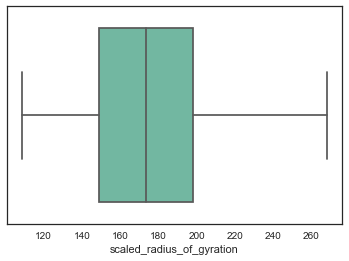

In [144]:
sns.set_style("white")
sns.boxplot(vehicle_df_complete['scaled_radius_of_gyration'], palette= "BuGn_r")
print(vehicle_df_complete['scaled_radius_of_gyration'].describe())

count    846.000000
mean      72.443262
std        7.468734
min       59.000000
25%       67.000000
50%       71.500000
75%       75.000000
max      135.000000
Name: scaled_radius_of_gyration.1, dtype: float64


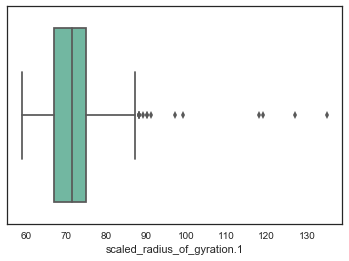

In [145]:
sns.set_style("white")
sns.boxplot(vehicle_df_complete['scaled_radius_of_gyration.1'], palette= "BuGn_r")
print(vehicle_df_complete['scaled_radius_of_gyration.1'].describe())

count    846.000000
mean       6.361702
std        4.903244
min        0.000000
25%        2.000000
50%        6.000000
75%        9.000000
max       22.000000
Name: skewness_about, dtype: float64


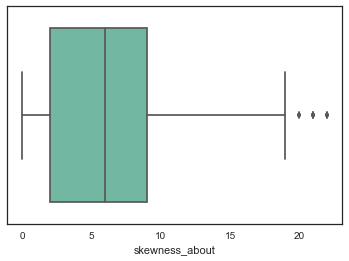

In [146]:
sns.set_style("white")
sns.boxplot(vehicle_df_complete['skewness_about'], palette= "BuGn_r")
print(vehicle_df_complete['skewness_about'].describe())

count    846.000000
mean      12.600473
std        8.930962
min        0.000000
25%        5.000000
50%       11.000000
75%       19.000000
max       41.000000
Name: skewness_about.1, dtype: float64


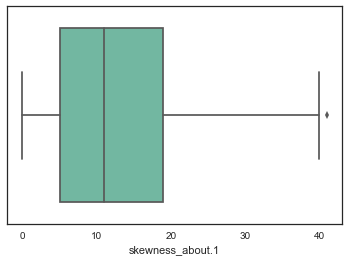

In [147]:
sns.set_style("white")
sns.boxplot(vehicle_df_complete['skewness_about.1'], palette= "BuGn_r")
print(vehicle_df_complete['skewness_about.1'].describe())

count    846.000000
mean     188.918440
std        6.152247
min      176.000000
25%      184.000000
50%      188.000000
75%      193.000000
max      206.000000
Name: skewness_about.2, dtype: float64


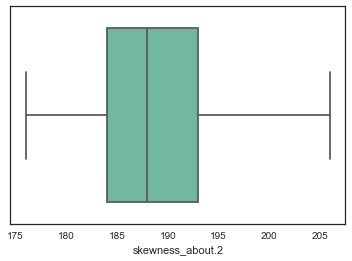

In [148]:
sns.set_style("white")
sns.boxplot(vehicle_df_complete['skewness_about.2'], palette= "BuGn_r")
print(vehicle_df_complete['skewness_about.2'].describe())

count    846.000000
mean     195.632388
std        7.438797
min      181.000000
25%      190.250000
50%      197.000000
75%      201.000000
max      211.000000
Name: hollows_ratio, dtype: float64


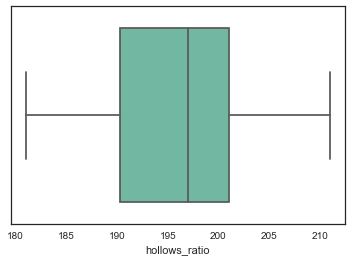

In [149]:
sns.set_style("white")
sns.boxplot(vehicle_df_complete['hollows_ratio'], palette= "BuGn_r")
print(vehicle_df_complete['hollows_ratio'].describe())

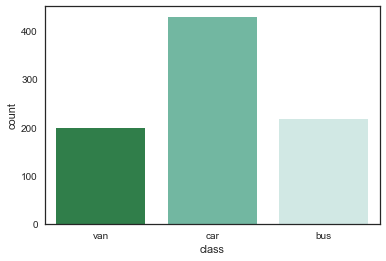

In [150]:
sns.set_style("white")
sns.countplot(vehicle_df_complete['class'], palette= "BuGn_r")

#### (Uni-variate) Findings :

    o Attributes 'radius_ratio','pr.axis_aspect_ratio','max.length_aspect_ratio','scaled_variance','scaled_variance.1','scaled_radius_of_gyration.1','skewness_about' and 'skewness_about.1' have outliers


#### Outlier Treatment

In [152]:
Q1 = vehicle_df_complete.quantile(0.25)
Q3 = vehicle_df_complete.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

compactness                     13.00
circularity                      9.00
distance_circularity            28.00
radius_ratio                    54.00
pr.axis_aspect_ratio             8.00
max.length_aspect_ratio          3.00
scatter_ratio                   51.00
elongatedness                   13.00
pr.axis_rectangularity           4.00
max.length_rectangularity       22.00
scaled_variance                 50.00
scaled_variance.1              268.50
scaled_radius_of_gyration       49.00
scaled_radius_of_gyration.1      8.00
skewness_about                   7.00
skewness_about.1                14.00
skewness_about.2                 9.00
hollows_ratio                   10.75
dtype: float64


#### Outlier treatment for 'pr.axis_aspect_ratio'

In [14]:
print(vehicle_df_complete['radius_ratio'].quantile(0.004))
print(vehicle_df_complete['radius_ratio'].quantile(0.996))

110.0
251.24


In [15]:
vehicle_df_complete["radius_ratio"] = np.where(vehicle_df_complete["radius_ratio"] <110, 110,vehicle_df_complete['radius_ratio'])
vehicle_df_complete["radius_ratio"] = np.where(vehicle_df_complete["radius_ratio"] >251, 251,vehicle_df_complete['radius_ratio'])

#### Outlier treatment for 'pr.axis_aspect_ratio'

In [16]:
print(vehicle_df_complete['pr.axis_aspect_ratio'].quantile(0.03))
print(vehicle_df_complete['pr.axis_aspect_ratio'].quantile(0.97))

52.0
73.0


In [17]:
vehicle_df_complete["pr.axis_aspect_ratio"] = np.where(vehicle_df_complete["pr.axis_aspect_ratio"] <52, 52,vehicle_df_complete['pr.axis_aspect_ratio'])
vehicle_df_complete["pr.axis_aspect_ratio"] = np.where(vehicle_df_complete["pr.axis_aspect_ratio"] >73, 73,vehicle_df_complete['pr.axis_aspect_ratio'])

#### Outlier treatment for 'max.length_aspect_ratio'

In [18]:
print(vehicle_df_complete['max.length_aspect_ratio'].quantile(0.01))
print(vehicle_df_complete['max.length_aspect_ratio'].quantile(0.98))

4.0
12.0


In [19]:
vehicle_df_complete["max.length_aspect_ratio"] = np.where(vehicle_df_complete["max.length_aspect_ratio"] <4, 4,vehicle_df_complete['max.length_aspect_ratio'])
vehicle_df_complete["max.length_aspect_ratio"] = np.where(vehicle_df_complete["max.length_aspect_ratio"] >12, 12,vehicle_df_complete['max.length_aspect_ratio'])

#### Outlier treatment for 'scaled_variance'

In [20]:
print(vehicle_df_complete['scaled_variance'].quantile(0.01))
print(vehicle_df_complete['scaled_variance'].quantile(0.97))

135.0
254.0


In [21]:
vehicle_df_complete["scaled_variance"] = np.where(vehicle_df_complete["scaled_variance"] <135, 135,vehicle_df_complete['scaled_variance'])
vehicle_df_complete["scaled_variance"] = np.where(vehicle_df_complete["scaled_variance"] >254, 254,vehicle_df_complete['scaled_variance'])

#### Outlier treatment for 'scaled_variance.1'

In [22]:
print(vehicle_df_complete['scaled_variance.1'].quantile(0.005))
print(vehicle_df_complete['scaled_variance.1'].quantile(0.995))

194.22500000000002
967.55


In [23]:
vehicle_df_complete["scaled_variance.1"] = np.where(vehicle_df_complete["scaled_variance.1"] <194, 194,vehicle_df_complete['scaled_variance.1'])
vehicle_df_complete["scaled_variance.1"] = np.where(vehicle_df_complete["scaled_variance.1"] >968, 968,vehicle_df_complete['scaled_variance.1'])

#### Outlier treatment for 'scaled_radius_of_gyration.1'

In [24]:
print(vehicle_df_complete['scaled_radius_of_gyration.1'].quantile(0.05))
print(vehicle_df_complete['scaled_radius_of_gyration.1'].quantile(0.95))

63.0
85.0


In [25]:
vehicle_df_complete["scaled_radius_of_gyration.1"] = np.where(vehicle_df_complete["scaled_radius_of_gyration.1"] <63, 63,vehicle_df_complete['scaled_radius_of_gyration.1'])
vehicle_df_complete["scaled_radius_of_gyration.1"] = np.where(vehicle_df_complete["scaled_radius_of_gyration.1"] >85, 85,vehicle_df_complete['scaled_radius_of_gyration.1'])

#### Outlier treatment for 'skewness_about'

In [26]:
print(vehicle_df_complete['skewness_about'].quantile(0.05))
print(vehicle_df_complete['skewness_about'].quantile(0.98))

0.0
18.0


In [27]:
vehicle_df_complete["skewness_about"] = np.where(vehicle_df_complete["skewness_about"] <0, 0,vehicle_df_complete['skewness_about'])
vehicle_df_complete["skewness_about"] = np.where(vehicle_df_complete["skewness_about"] >18, 18,vehicle_df_complete['skewness_about'])

#### Outlier treatment for 'skewness_about.1'

In [28]:
print(vehicle_df_complete['skewness_about.1'].quantile(0.01))
print(vehicle_df_complete['skewness_about.1'].quantile(0.99))

0.0
37.09999999999991


In [29]:
vehicle_df_complete["skewness_about.1"] = np.where(vehicle_df_complete["skewness_about.1"] <0, 0,vehicle_df_complete['skewness_about.1'])
vehicle_df_complete["skewness_about.1"] = np.where(vehicle_df_complete["skewness_about.1"] >37, 37,vehicle_df_complete['skewness_about.1'])

In [177]:
vehicle_df_complete.shape

(846, 19)

# Bivariate

In [207]:
vehicle_df_complete.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

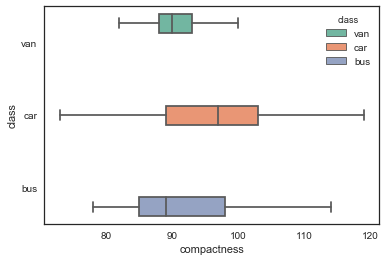

In [208]:
sns.boxplot(x= 'compactness', y= 'class',hue='class',data=vehicle_df_complete, palette= "Set2")

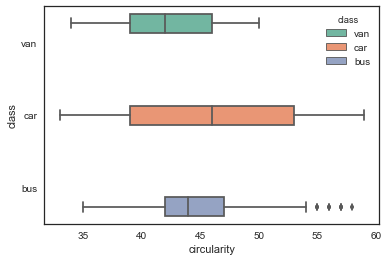

In [185]:
sns.boxplot(x= 'circularity', y= 'class',hue='class',data=vehicle_df_complete, palette= "Set2")

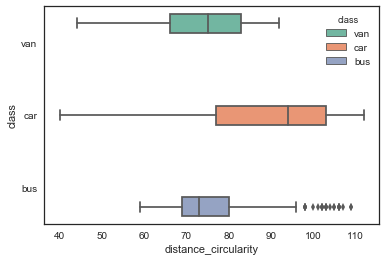

In [186]:
sns.boxplot(x= 'distance_circularity', y= 'class',hue='class',data=vehicle_df_complete, palette= "Set2")

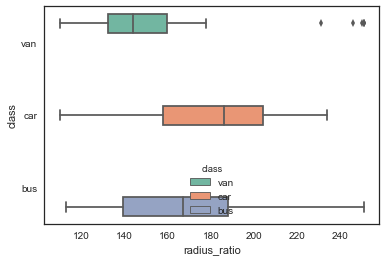

In [187]:
sns.boxplot(x= 'radius_ratio', y= 'class',hue='class',data=vehicle_df_complete, palette= "Set2")

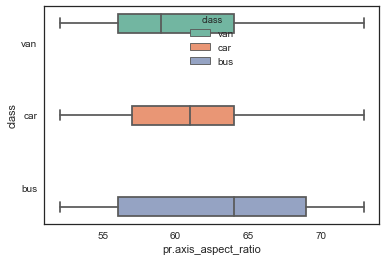

In [188]:
sns.boxplot(x= 'pr.axis_aspect_ratio', y= 'class',hue='class',data=vehicle_df_complete, palette= "Set2")

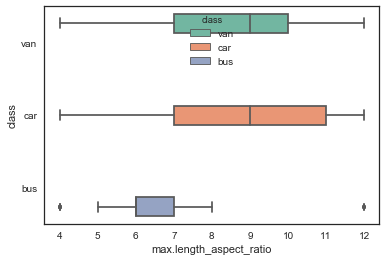

In [189]:
sns.boxplot(x= 'max.length_aspect_ratio', y= 'class',hue='class',data=vehicle_df_complete, palette= "Set2")

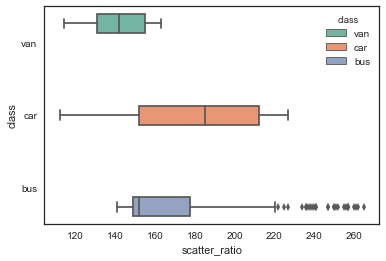

In [190]:
sns.boxplot(x= 'scatter_ratio', y= 'class',hue='class',data=vehicle_df_complete, palette= "Set2")

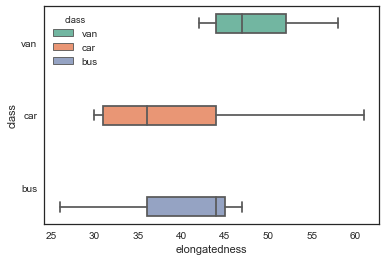

In [191]:
sns.boxplot(x= 'elongatedness', y= 'class',hue='class',data=vehicle_df_complete, palette= "Set2")

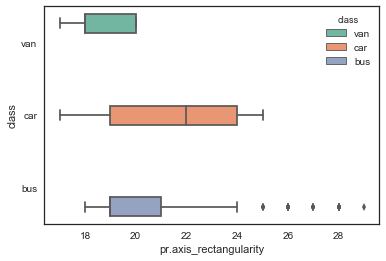

In [192]:
sns.boxplot(x= 'pr.axis_rectangularity', y= 'class',hue='class',data=vehicle_df_complete, palette= "Set2")

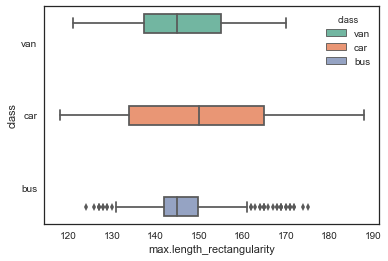

In [193]:
sns.boxplot(x= 'max.length_rectangularity', y= 'class',hue='class',data=vehicle_df_complete, palette= "Set2")

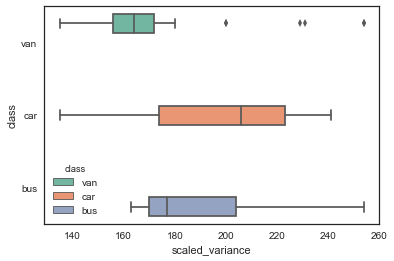

In [194]:
sns.boxplot(x= 'scaled_variance', y= 'class',hue='class',data=vehicle_df_complete, palette= "Set2")

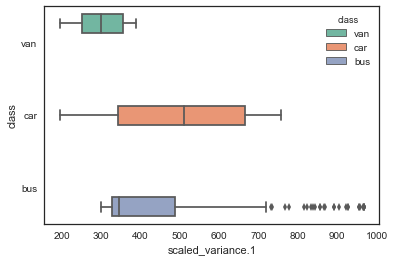

In [195]:
sns.boxplot(x= 'scaled_variance.1', y= 'class',hue='class',data=vehicle_df_complete, palette= "Set2")

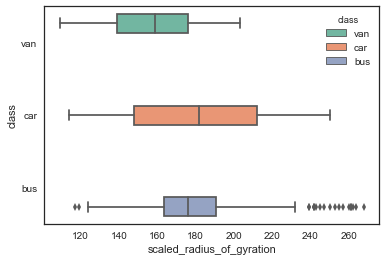

In [196]:
sns.boxplot(x= 'scaled_radius_of_gyration', y= 'class',hue='class',data=vehicle_df_complete, palette= "Set2")

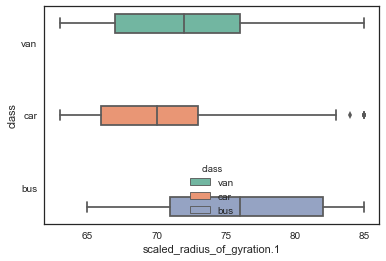

In [197]:
sns.boxplot(x= 'scaled_radius_of_gyration.1', y= 'class',hue='class',data=vehicle_df_complete, palette= "Set2")

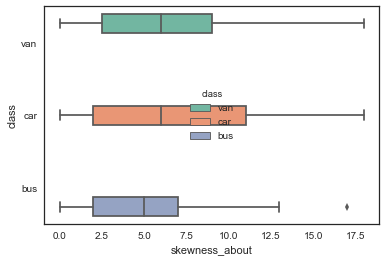

In [198]:
sns.boxplot(x= 'skewness_about', y= 'class',hue='class',data=vehicle_df_complete, palette= "Set2")

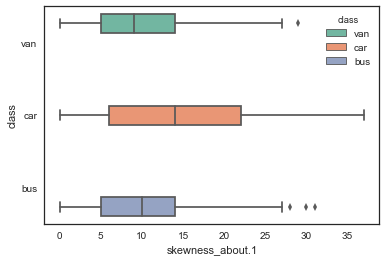

In [199]:
sns.boxplot(x= 'skewness_about.1', y= 'class',hue='class',data=vehicle_df_complete, palette= "Set2")

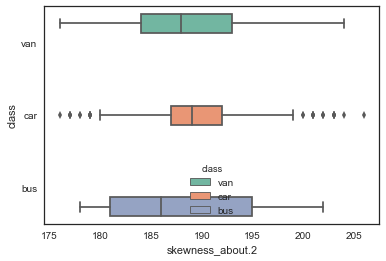

In [200]:
sns.boxplot(x= 'skewness_about.2', y= 'class',hue='class',data=vehicle_df_complete, palette= "Set2")

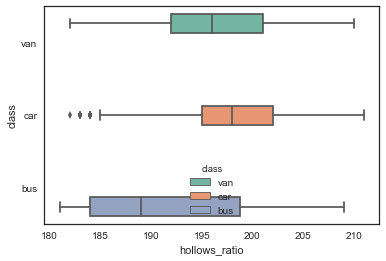

In [201]:
sns.boxplot(x= 'hollows_ratio', y= 'class',hue='class',data=vehicle_df_complete, palette= "Set2")

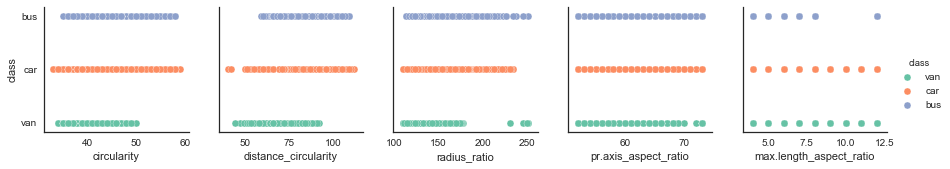

In [202]:
sns.pairplot(vehicle_df_complete, x_vars=('circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio'),y_vars='class',hue='class', palette= "Set2")

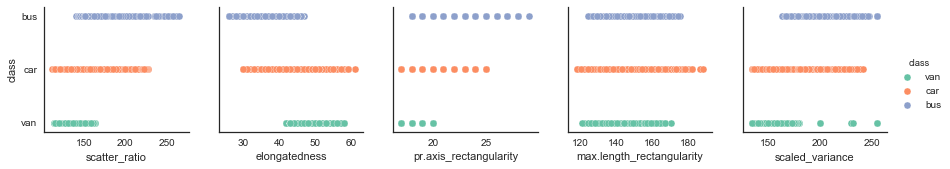

In [203]:
sns.pairplot(vehicle_df_complete, x_vars=( 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance'),y_vars='class',hue='class', palette= "Set2")

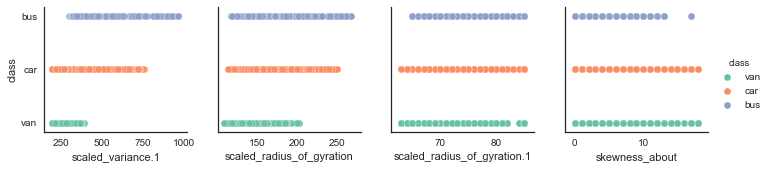

In [204]:
sns.pairplot(vehicle_df_complete, x_vars=( 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about'),y_vars='class',hue='class', palette= "Set2")

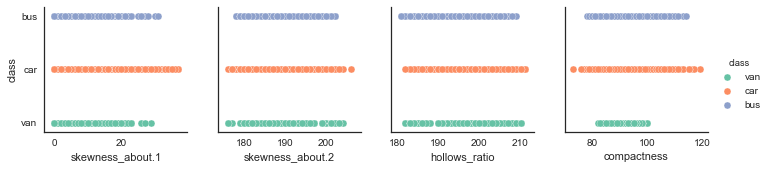

In [227]:
sns.pairplot(vehicle_df_complete, x_vars=( 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio','compactness'),y_vars='class',hue='class', palette= "Set2")

#### (Bi-variate) Findings :
            o From the boxplots with respect to the 'class' variable, the following attributes may be considered to have good variance. 'sactter_ratio', 'elongatedness', 'pr.axis_rectangularity,'scaled_variance.1'.
            

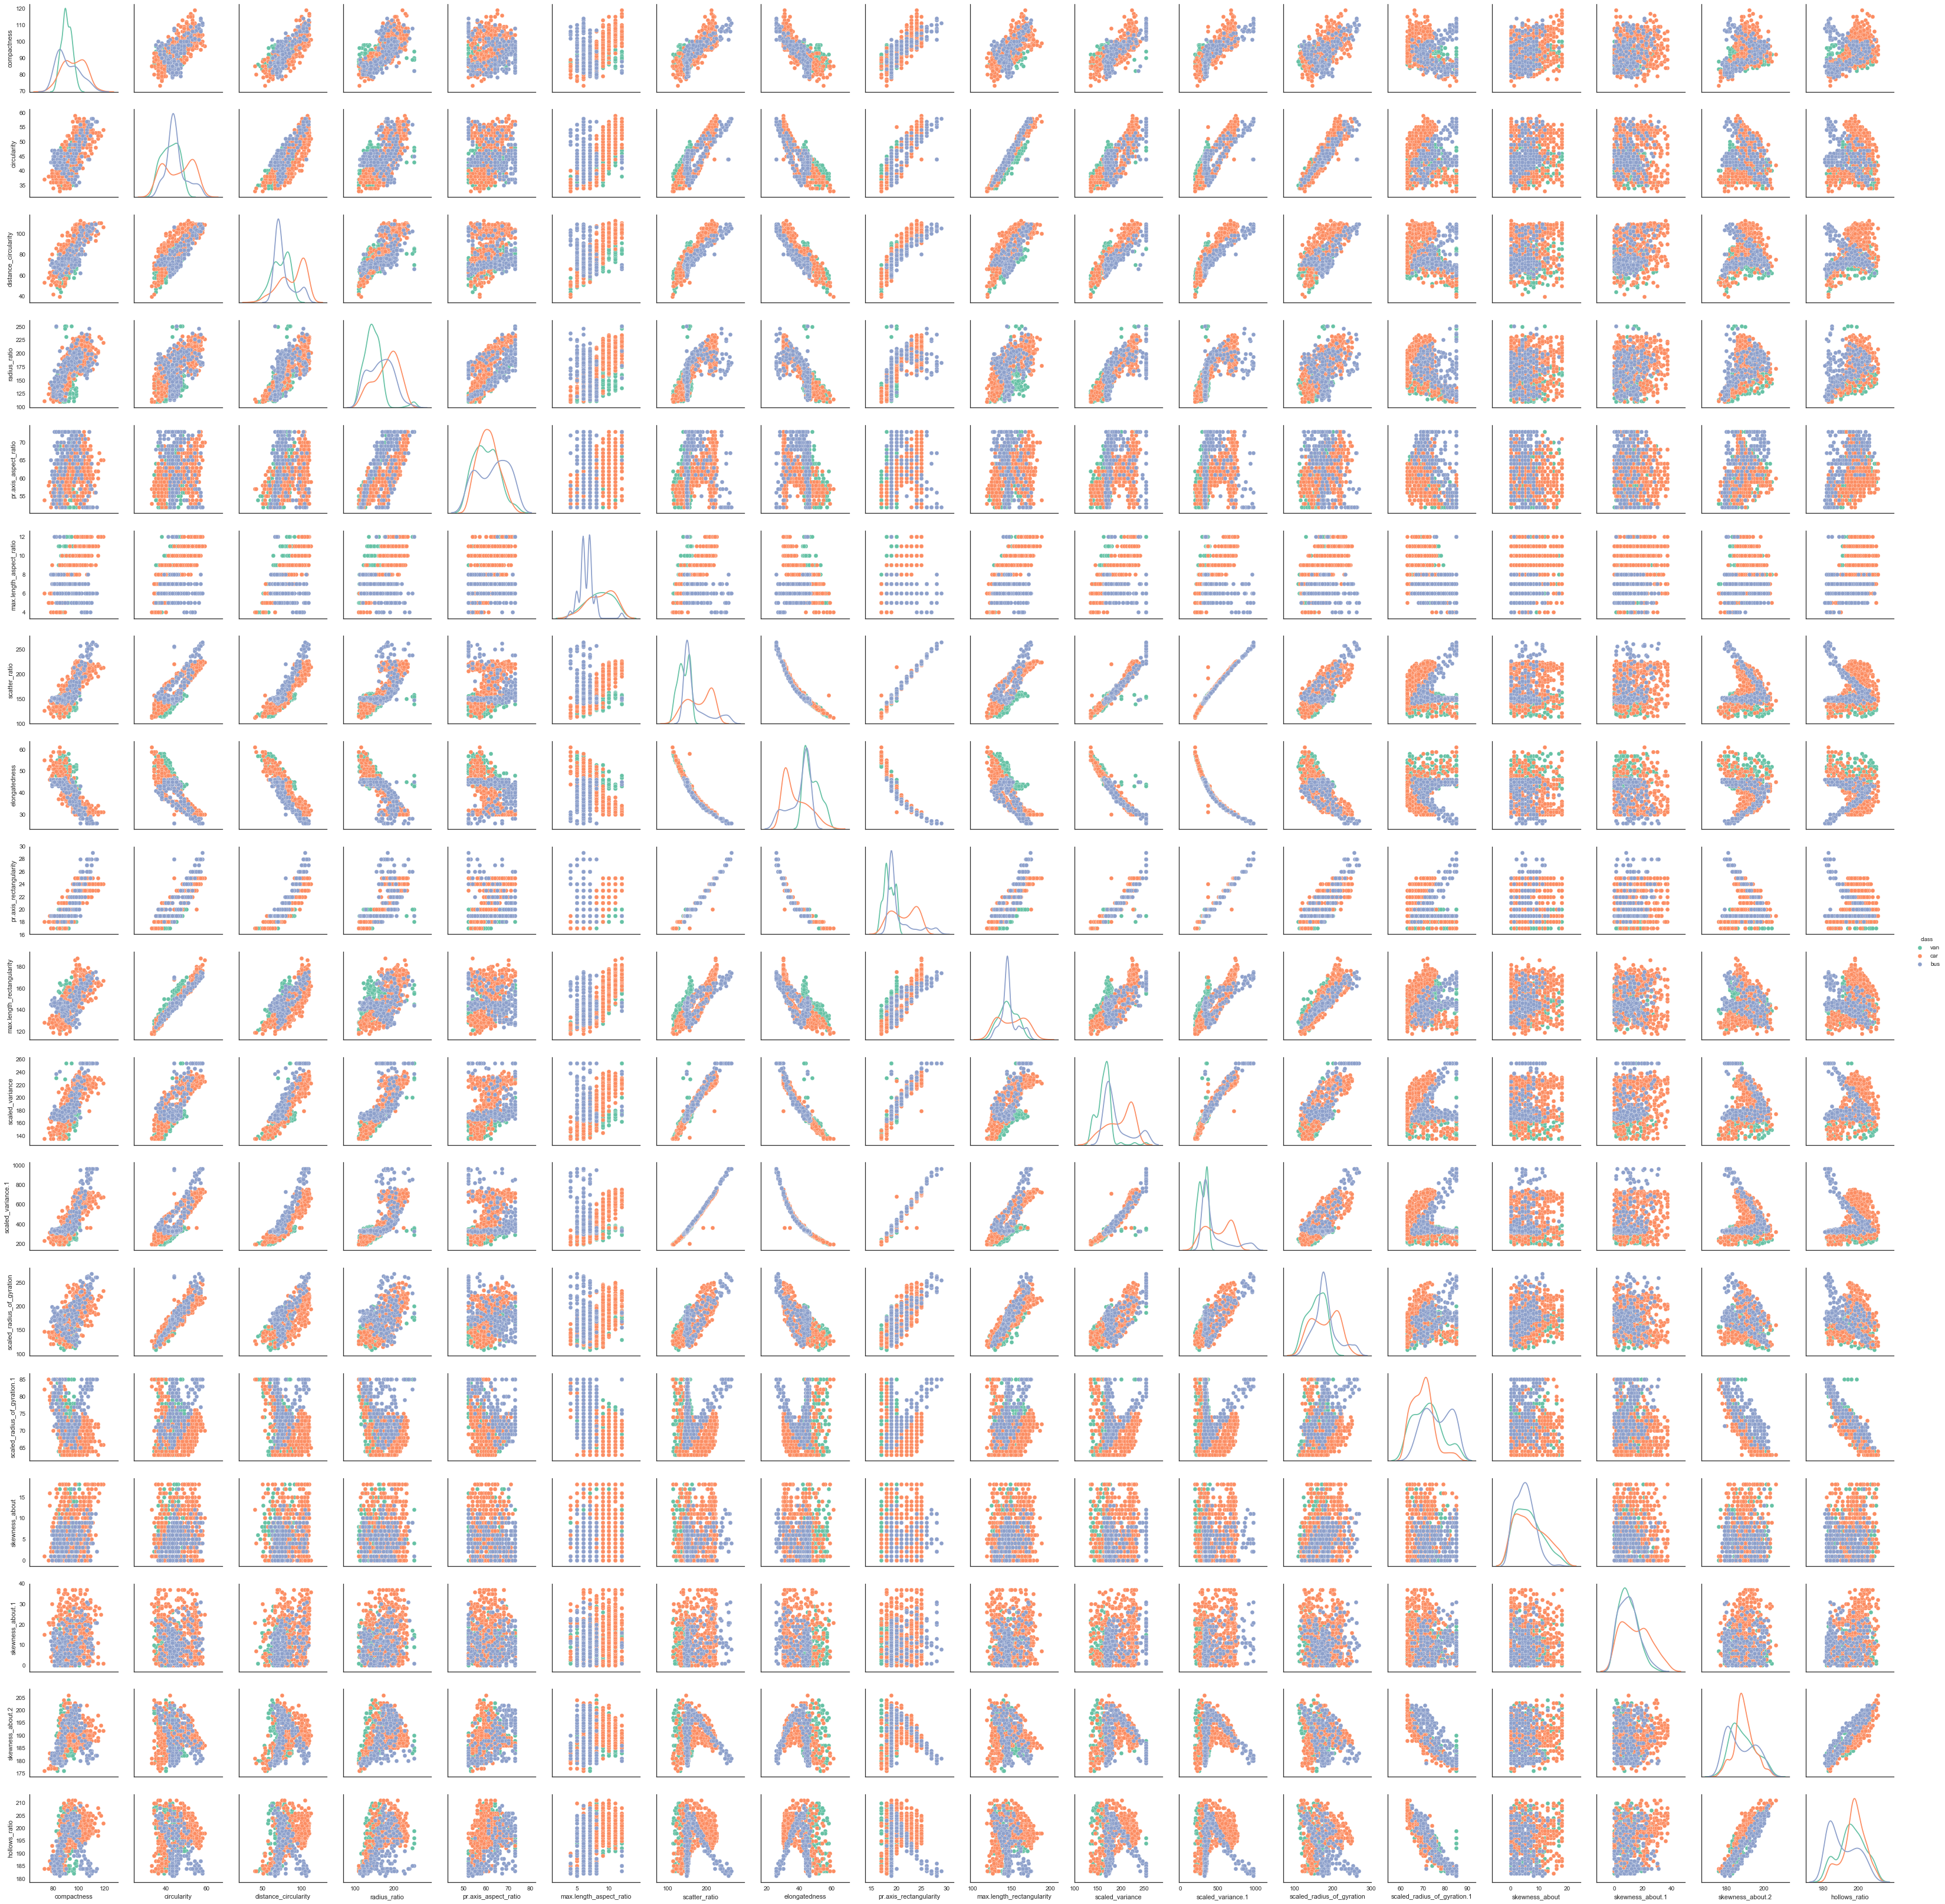

In [229]:
sns.pairplot(vehicle_df_complete, diag_kind='kde',hue = 'class', palette= "Set2")

    # Due to the presence of a large number of attributes, the pair-plot is not intuitive enough
    # The signal to noise ratio is pretty low as per the pairplot. 
    # Some attributes have very strong correlation with other attributes
    # Let's check the correlation matrix to see which all variables have strong correlation

In [230]:
corr = vehicle_df_complete.corr()

Text(0.5,1,'Correlation matrix')

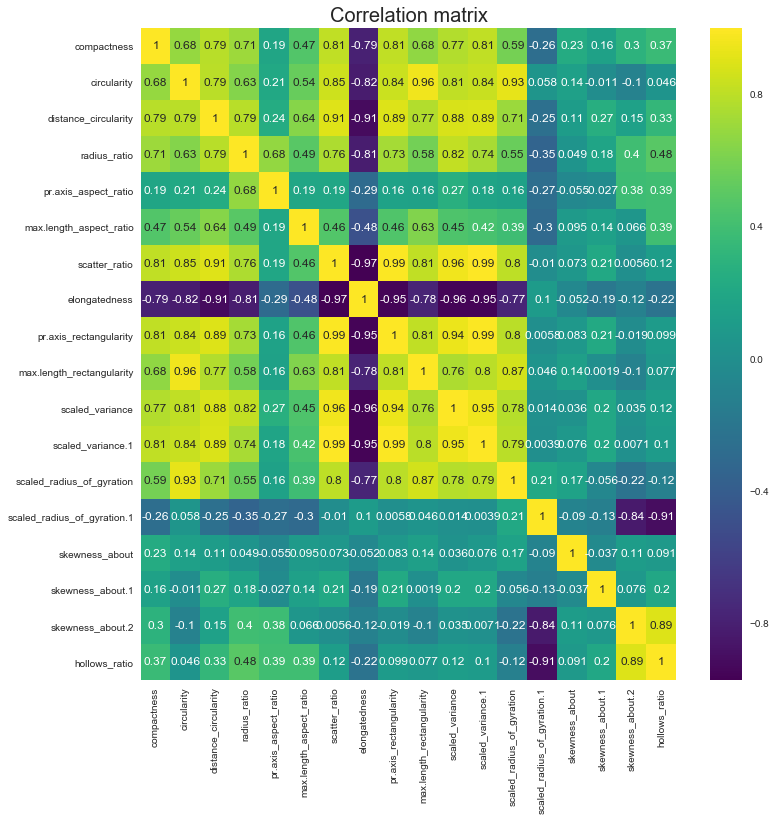

In [240]:
sns.set(rc={'figure.figsize':(12,12)})
sns.heatmap(corr, annot = True, cmap='viridis')
plt.title('Correlation matrix', fontsize = 20)

    # There is presence of very strong positive and negative correlation among variables and based on this information, we can shortlist our attributes' list. But dropping certain attributes will always lead to information loss. Hence we aren't dropping any attributes from the dataframe

# PCA 

In [30]:
vehicle_df_complete.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [31]:
# Creating the X and y variables

X = vehicle_df_complete[vehicle_df_complete.columns[:-1]]
y = vehicle_df_complete["class"]

In [32]:
X.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio'],
      dtype='object')

In [33]:
X.shape

(846, 18)

In [34]:
# We transform (centralize) the entire X (independent variable data) through standard scaler transformation. We will create the PCA dimensions
# on these distributions. 

sc = StandardScaler()
X_std =  sc.fit_transform(X)          
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00118343  0.68569786  0.79086299  0.71181406  0.18896383  0.46854991
   0.81358214 -0.78968322  0.81465658  0.67694334  0.77382562  0.81537643
   0.58593517 -0.26519363  0.23129425  0.15719839  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.63532199  0.20983412  0.54468308
   0.8489411  -0.82244387  0.84439802  0.96245572  0.81199493  0.83723499
   0.92691166  0.05792296  0.14455648 -0.01090104 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.78740151  0.24268643  0.6411293
   0.90614687 -0.9123854   0.89408198  0.77544391  0.88390918  0.88785655
   0.70660663 -0.24923327  0.11261647  0.26583186  0.14627113  0.33312625]
 [ 0.71181406  0.63532199  0.78740151  1.00118343  0.68228955  0.48798593
   0.75827789 -0.81386412  0.73212338  0.57960262  0.81628207  0.74358734
   0.54858098 -0.34632972  0.04868659  0.17942287  0.3965245   0.48531291]
 [ 0.18896383  0.20983412  0.24268643  0.68228955  1.00118343  0.19344111
   0.1924911 

In [35]:
print(X_std)

[[ 0.16058035  0.51807313  0.05717723 ...  0.38505471 -0.31201194
   0.18395733]
 [-0.32546965 -0.62373151  0.12074088 ...  0.15969581  0.01326483
   0.45297703]
 [ 1.25419283  0.84430302  1.51914112 ... -0.40370142 -0.14937355
   0.04944748]
 ...
 [ 1.49721783  1.49676282  1.20132288 ... -0.96709866 -0.31201194
   0.72199673]
 [-0.93303214 -1.43930625 -0.26064101 ...  1.39916973  0.17590322
  -0.08506238]
 [-1.05454464 -1.43930625 -1.02340478 ...  0.6104136  -0.47465032
  -0.75761164]]


In [247]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-2.72039781e-01 -8.99237201e-02  4.88145779e-02  1.67923482e-01
  -1.66911584e-01  1.84960351e-01 -2.68593164e-01 -7.51636828e-01
   3.18498734e-01  2.18470730e-01 -1.10603699e-01 -1.68884512e-02
  -1.01654158e-01  1.11092757e-02 -1.22129663e-01 -2.03259577e-03
   2.65067168e-02  1.97035120e-02]
 [-2.87344027e-01  1.33441130e-01  1.98029592e-01 -4.11898532e-02
   1.34350405e-01 -6.79761913e-04  3.98332771e-01 -8.79687035e-02
   4.30289772e-02 -5.24719797e-02  2.51471234e-01 -1.62580443e-01
  -7.05912215e-02  1.28495591e-02 -2.37706721e-01  6.73962268e-02
  -7.16766120e-01  5.73990458e-03]
 [-3.02161002e-01 -4.77100967e-02 -6.87922442e-02  1.02984379e-01
   9.44966087e-02  5.53184805e-03 -1.22596426e-01  3.19889017e-01
   2.42098291e-01  9.90123908e-02 -4.56834893e-01 -6.52447106e-01
   1.91446306e-01 -7.54238856e-03  1.30145832e-01  2.05514142e-03
  -6.97852475e-02 -5.86868225e-02]
 [-2.68683738e-01 -1.92186462e-01 -5.64113313e-02 -2.74588729e-01
  -1.19506374e-01 -

In [248]:
# Making a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sorting the (eigenvalue, eigenvector) pairs with respect to eigenvalue
eig_pairs.sort()
# Sorting it in descending order
eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(9.753190699235539, array([-0.27203978, -0.28734403, -0.302161  , -0.26868374, -0.10104855,
       -0.19037229, -0.30991653,  0.30856407, -0.30661521, -0.27824167,
       -0.30352234, -0.3061076 , -0.26323156,  0.04419656, -0.04095624,
       -0.05875673, -0.03777101, -0.08463742])), (3.310342876985158, array([-0.08992372,  0.13344113, -0.0477101 , -0.19218646, -0.2415264 ,
       -0.10315699,  0.07532389, -0.01303155,  0.0875486 ,  0.12333208,
        0.06074689,  0.08167336,  0.2130041 ,  0.50233684, -0.0357908 ,
       -0.09705526, -0.50644573, -0.5117989 ])), (1.192964617677051, array([ 0.04881458,  0.19802959, -0.06879224, -0.05641133,  0.05494598,
        0.14202477, -0.1105392 ,  0.09662079, -0.1068288 ,  0.21009911,
       -0.1329062 , -0.11088419,  0.20235011, -0.06799858,  0.56690101,
       -0.66919662,  0.06292377,  0.03871919])), (1.161440820247689, array([ 0.16792348, -0.04118985,  0.10298438, -0.27458873, -0.64398612,
        0.1472632 ,  0.03076   ,  0.044408  ,  0.056

In [250]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 18 entries as there are 18 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 18 entries with 18 th entry 
# cumulative reaching almost 100%

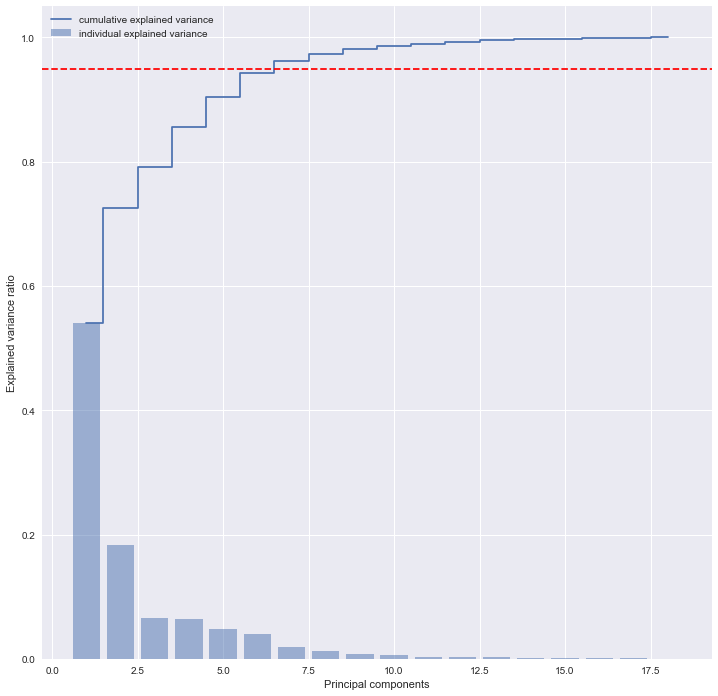

In [257]:
plt.bar(range(1,19), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,19),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.axhline(y = 0.95, linestyle = '--', color = 'red')
plt.legend(loc = 'best')
plt.show()

    # The above chart says, the first 7 principal componenets (eigen vectors) expalin 95% variance in the original data
    # So we will project the original data into the first 7 principal component dimensions

In [260]:
PCA_reduce = np.array(eigvectors_sorted[0:7])   # Reducing from 8 to 4 dimension space

X_std_7D = np.dot(X_std,PCA_reduce.T)   # projecting original data into principal component dimensions

Proj_data_df = pd.DataFrame(X_std_7D)  # converting array to dataframe for pairplot

In [261]:
Proj_data_df.head()

0         1         2         3         4         5         6
0 -0.571073 -0.643745  0.405443 -0.999453  0.958454 -1.513574  0.447520
1  1.529387 -0.384400  0.301602  1.176880  0.519996 -0.116882 -0.193321
2 -3.915789  0.218021  1.200960  0.098464 -0.686320 -0.835718 -0.708717
3  1.554820 -3.050767  0.432103  0.214466  0.605255  0.492105 -0.113259
4  0.133903  1.840505  0.469504 -2.036734  0.648376 -3.230426 -1.488686

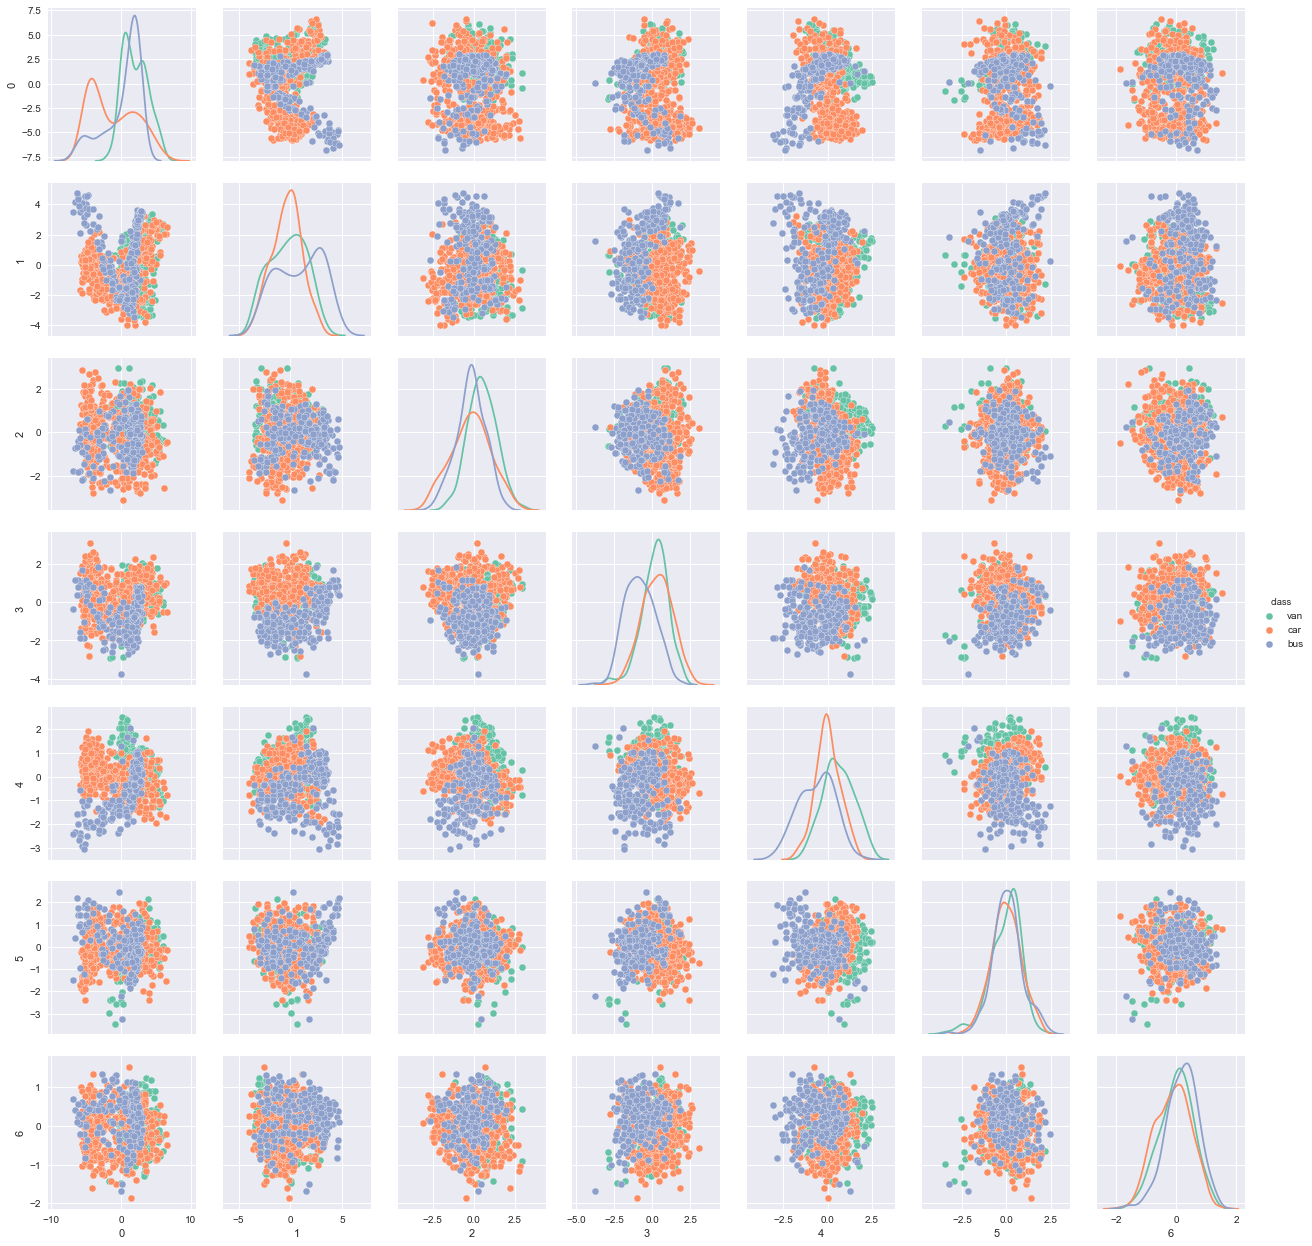

In [263]:
#Let us check it visually the effects of PCA on signal to noise ratio
Proj_data_vehicle_df = Proj_data_df.join(y)

sns.pairplot(Proj_data_vehicle_df, diag_kind='kde',hue = 'class',palette= "Set2") 

#### We can see a significant improvement to the signal to noise ratio as compared to the one before PCA

In [273]:
Proj_data_vehicle_df.head()

0         1         2         3         4         5         6 class
0 -0.571073 -0.643745  0.405443 -0.999453  0.958454 -1.513574  0.447520   van
1  1.529387 -0.384400  0.301602  1.176880  0.519996 -0.116882 -0.193321   van
2 -3.915789  0.218021  1.200960  0.098464 -0.686320 -0.835718 -0.708717   car
3  1.554820 -3.050767  0.432103  0.214466  0.605255  0.492105 -0.113259   van
4  0.133903  1.840505  0.469504 -2.036734  0.648376 -3.230426 -1.488686   bus

In [276]:
# We need to label encode the 'class' variable

label_encoder = preprocessing.LabelEncoder()
Proj_data_vehicle_df['class']= label_encoder.fit_transform(Proj_data_vehicle_df['class'])

In [281]:
Proj_data_vehicle_df.head()

0         1         2         3         4         5         6  class
0 -0.571073 -0.643745  0.405443 -0.999453  0.958454 -1.513574  0.447520      2
1  1.529387 -0.384400  0.301602  1.176880  0.519996 -0.116882 -0.193321      2
2 -3.915789  0.218021  1.200960  0.098464 -0.686320 -0.835718 -0.708717      1
3  1.554820 -3.050767  0.432103  0.214466  0.605255  0.492105 -0.113259      2
4  0.133903  1.840505  0.469504 -2.036734  0.648376 -3.230426 -1.488686      0

In [277]:
Proj_data_vehicle_df['class'].value_counts()

1    429
0    218
2    199
Name: class, dtype: int64

# SVM

In [280]:
# Instantiating the classifier

svm_model1 = svm.SVC()

In [285]:
x= Proj_data_vehicle_df.iloc[:,0:7]
Y= Proj_data_vehicle_df['class']

In [287]:
x_train,x_test,Y_train,Y_test = train_test_split(x,Y, test_size=0.25, random_state=100)

In [288]:
svm_model1.fit(x_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [289]:
svm_model1.score(x_test,Y_test)

0.910377358490566

In [291]:
Y_pred = svm_model1.predict(x_test)

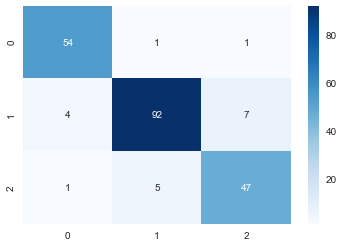

In [298]:
conf_mtx= metrics.confusion_matrix(Y_test, Y_pred)
sns.heatmap(conf_mtx,annot=True,cmap='Blues')

# Applying grid-search cv to check best values for hyperparameters and do cross-validation

In [300]:
# Creating the parameter grid for gridsearrch cv

param_grid = {
    'C': [0.01,0.05,0.5,1],
    'kernel': ['linear','rbf'],
    
    }

n_folds = 5

# Instantiating the grid search on dt_model
grid_search = GridSearchCV(estimator = svm_model1, param_grid = param_grid, 
                          cv = n_folds, n_jobs = -1, verbose = 2)

In [301]:
# Fitting the grid search to the data
grid_search.fit(x_train, Y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  33 out of  40 | elapsed:    5.4s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    5.4s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.01, 0.05, 0.5, 1], 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [302]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)
print(grid_search.best_params_)

best accuracy 0.9148264984227129
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
{'C': 1, 'kernel': 'rbf'}


### The grid-search cv with 5 fold cross-validation shows the best parameters for 'C' is 1 and 'kernel' is rbf. We have already selected these hyperparameters while building the SVC model, hence we are not running the SVC model again with the best parameters. After the cross-validation the accuracy comes to around 91.4%